<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
T = np.zeros([2]*5, dtype=int)

In [6]:
slices = [slice(None, None)]*len(T.shape)

r = 2
par = (1, 3)
N = 2**r
vals = [np.unravel_index(i, [2]*r) for i in range(N)]
print(vals)

for val, ix in enumerate(vals):
    for i, d in enumerate(par):
        slices[d] = slice(ix[i], ix[i]+1)
    T[tuple(slices)] = val


[(0, 0), (0, 1), (1, 0), (1, 1)]


In [7]:
mat = T.reshape(4, -1)

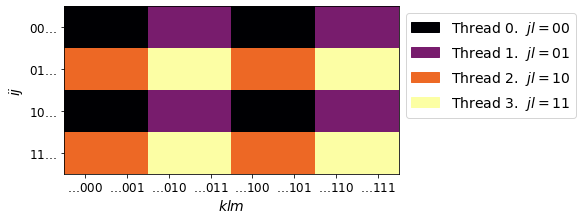

In [33]:
im = plt.imshow(mat, interpolation='none', cmap=plt.cm.inferno)

colors = [im.cmap(im.norm(value)) for value in np.unique(mat.ravel())]
patches = [mpl.patches.Patch(color=colors[i], label=f"Thread {i}.  {r'$jl='+f'{i:02b}$'}") for i in range(N)]
plt.legend(handles=patches, bbox_to_anchor=(1,1), prop={'size':14}, loc = 2)

labx = [f"$l={f'{x:02b}'[-1]}$" for x in mat[0] ]
laby = [f"$j={f'{x:02b}'[-2]}$" for x in mat[:,0] ]

laby = [f"${x:02b}\dots$" for x in range(mat.shape[0]) ]
labx = [f"$\dots {x:03b}$" for x in range(mat.shape[1]) ]
ax = plt.gca()
ax.set_xticks(range(8))
ax.set_yticks(range(4))
ax.set_xticklabels(labx)
ax.set_yticklabels(laby)
ax.tick_params(labelsize=12)
ax.set_ylabel(r'$ij$', fontsize=14)
ax.set_xlabel(r'$klm$', fontsize=14)

plt.savefig('figures/thread_map.pdf')

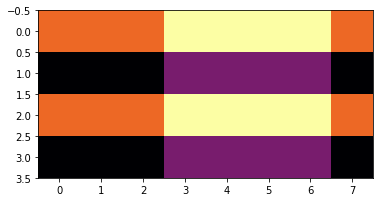

In [171]:
x = np.roll(mat, (1,-1), axis=(0,1))
plt.imshow(x, cmap=plt.cm.inferno)

In [174]:
import torch as T
T.roll(T.from_numpy(mat), (1,-1), dims=(0,1))

tensor([[2, 2, 2, 3, 3, 3, 3, 2],
        [0, 0, 0, 1, 1, 1, 1, 0],
        [2, 2, 2, 3, 3, 3, 3, 2],
        [0, 0, 0, 1, 1, 1, 1, 0]])

In [175]:
mat

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [2, 2, 2, 2, 3, 3, 3, 3]])